### <i>Estudo</i> <b>Análise Exploratória de Dados</b><br>

In [130]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando arquivo em Excel da internet
excel_doc = 'https://github.com/diasctiago/dio/blob/main/An%C3%A1lise%20de%20dados%20com%20Python%20e%20Pandas/AdventureWorks.xlsx?raw=true'
df = pd.read_excel(excel_doc)

# Exibindo os primeiros registros
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [131]:
# Verificando as colunas do dataset
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [132]:
# Consultando detalhes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [133]:
# Quantidade de Linhas e Colunas do dataset
df.shape

(904, 16)

In [134]:
print(f"O dataset possui {df.shape[0]} registros e {df.shape[1]} atributos.")

O dataset possui 904 registros e 16 atributos.


In [135]:
# Descrição estatística básica das variáveis numéricas
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [136]:
# Verificando dados nulos
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [137]:
# Novas colunas para enriquecimento dos dados

# Dias de envio da compra
df['Dias de Envio'] = df['Data Envio'] - df['Data Venda']
# Custo total do produto
df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']
# Lucro bruto da venda
df['Lucro Bruto'] = df['Valor Venda'] - df['Custo Total']
# Lucro líquido da venda
df['Lucro Líquido'] = df['Lucro Bruto'] - df['Valor Desconto']
# Percentual do Lucro bruto da venda
df['% Lucro Bruto'] = (1 - (df['Custo Total'] / df['Valor Venda'])) * 100
# Percentual do Lucro líquido da venda
df['% Lucro Líquido'] = (1 - (df['Custo Total'] / (df['Valor Venda'] - df['Valor Desconto']))) * 100

In [138]:
# Contagem de venda por produto
df['Produto'].value_counts()

Adventure Works Laptop15.4W M1548 Black            123
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          118
Adventure Works Laptop15.4W M1548 Red              115
Fabrikam Trendsetter 2/3'' 17mm X100 Black         103
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          94
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         90
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         89
Headphone Adapter for Contoso Phone E130 Silver     87
Headphone Adapter for Contoso Phone E130 White      85
Name: Produto, dtype: int64

In [139]:
# Contagem de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [140]:
# Lojas únicas
df['ID Loja'].unique()

array([199, 306, 307])

In [141]:
# Quantidade de lojas únicas
len(df['ID Loja'].unique())

3

In [142]:
# Menor data no conjuto de dados
df['Data Venda'].min()

Timestamp('2008-01-02 00:00:00')

In [143]:
# Maior data no conjuto de dados
df['Data Venda'].max()

Timestamp('2009-12-31 00:00:00')

In [144]:
# Agrupamento dos valores médios por produtos
valores = ['Produto', 'Valor Desconto', 'Valor Venda', 'Custo Total', 'Lucro Bruto', 'Lucro Líquido', '% Lucro Bruto', '% Lucro Líquido']
df[valores].groupby(['Produto']).mean()

,Valor Desconto,Valor Venda,Custo Total,Lucro Bruto,Lucro Líquido,% Lucro Bruto,% Lucro Líquido
Produto,,,,,,,
Adventure Works Laptop15.4W M1548 Black,639.616423,6071.456748,3086.208293,2985.248455,2345.632033,48.535883,40.090469
Adventure Works Laptop15.4W M1548 Red,728.800522,6172.295130,3173.593565,2998.701565,2269.901043,48.381596,39.832728
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,936.029326,8986.622360,3287.586067,5699.036292,4763.006966,63.136235,57.524054
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,659.317021,8312.065957,2972.422340,5339.643617,4680.326596,63.730700,58.925853
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,815.476889,7933.656444,2898.786000,5034.870444,4219.393556,63.295974,57.783949
Fabrikam Trendsetter 2/3'' 17mm X100 Black,835.759223,7974.726214,2919.057670,5055.668544,4219.909320,63.380356,58.038870
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,883.245763,8144.381356,2991.000254,5153.381102,4270.135339,62.819290,56.522933
Headphone Adapter for Contoso Phone E130 Silver,292.831014,2604.498641,1476.217011,1128.281630,835.450616,42.636315,32.660230
Headphone Adapter for Contoso Phone E130 White,306.173520,2633.002009,1497.537882,1135.464127,829.290607,42.936747,33.856421


In [145]:
# Somando os valores totais
total_descontos = df['Valor Desconto'].sum()
total_vendas = df['Valor Venda'].sum()
total_custos = df['Custo Total'].sum()
total_lucro_bruto = df['Lucro Bruto'].sum()
total_lucro_liquido = df['Lucro Líquido'].sum()

# Usando a função currency da biblioteca locale para formatar o valor
import locale
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

# Mostrando os valores totais
print('Total de descontos foi------>', locale.currency(total_descontos))
print('Total de vendas foi--------->', locale.currency(total_vendas))
print('Total de custos foi--------->', locale.currency(total_custos))
print('Lucro bruto foi------------->', locale.currency(total_lucro_bruto))
print('Lucro líquido foi----------->', locale.currency(total_lucro_liquido))

Total de descontos foi------> $622967.46
Total de vendas foi---------> $5984606.14
Total de custos foi---------> $2486783.05
Lucro bruto foi-------------> $3497823.09
Lucro líquido foi-----------> $2874855.64


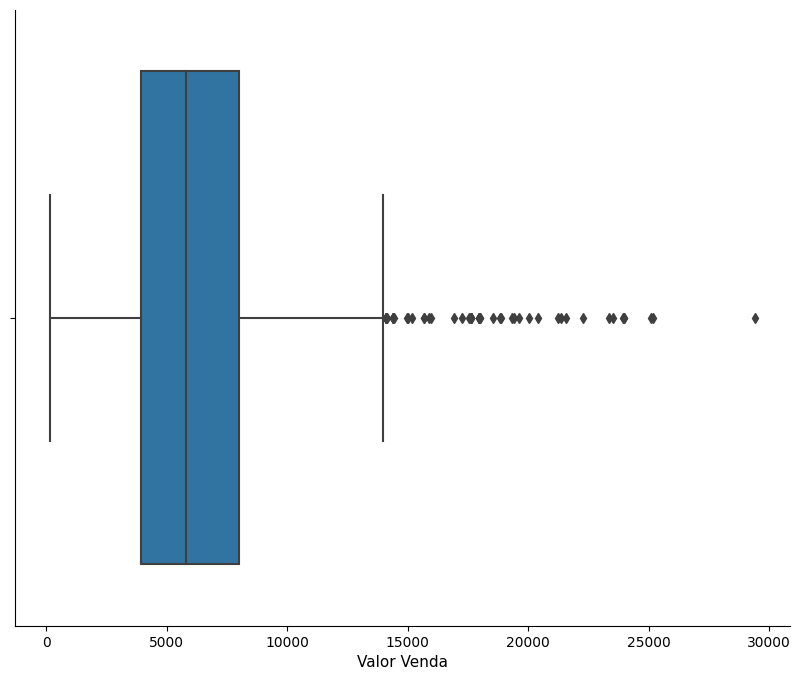

In [146]:
# Configurações dos gráficos

# Tamanho padrão da figura em polegadas (largura, altura)
plt.rcParams['figure.figsize'] = (10,8)
# Tamanho padrão da fonte das legendas no eixo x
plt.rcParams['xtick.labelsize'] = 10
# Tamanho padrão da fonte das legendas no eixo y
plt.rcParams['ytick.labelsize'] = 10
# Tamanho padrão da fonte do texto
plt.rcParams['font.size'] = 11
# Tamanho padrão da fonte do título dos eixos
plt.rcParams['axes.titlesize'] = 12
# Remove borda superior do gráfico
plt.rcParams['axes.spines.top'] = False
# Remove borda direita do gráfico
plt.rcParams['axes.spines.right'] = False


# Identificando outliers nos valores de vendas
sns.boxplot(x = df['Valor Venda'])
plt.show()

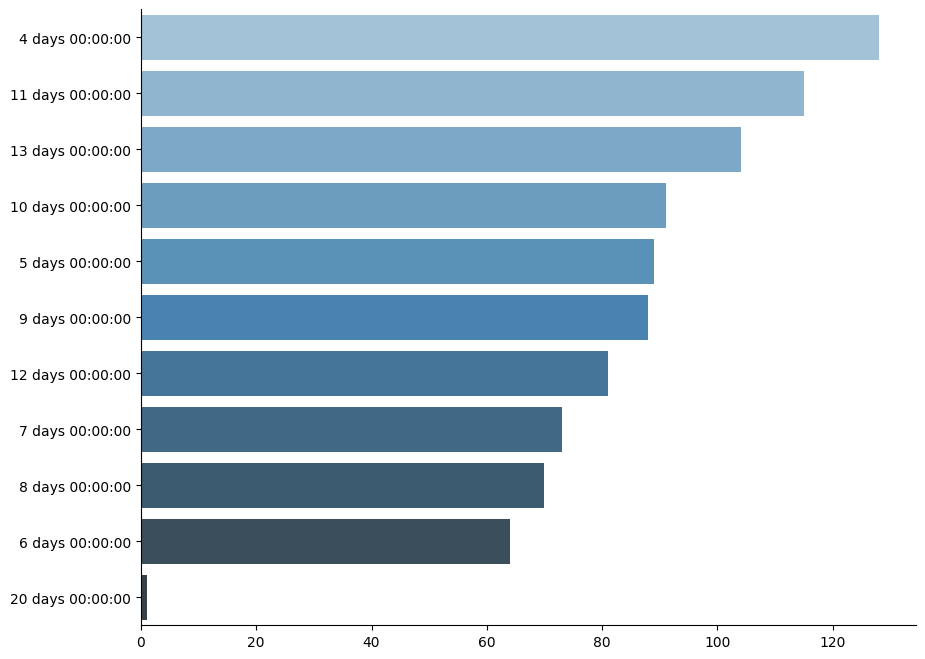

In [147]:
# Identificando as quantidades dos dias de envio
x = df['Dias de Envio'].value_counts().values
y = df['Dias de Envio'].value_counts().index
sns.barplot(x=x, y=y, palette="Blues_d")
# Algumas Palletas = Wistia, summer, bone, mako, cividis, cool, winter, viridis, gist_heat, copper
# inferno, magma, ocean, plasma, turbo, vlag, gnuplot2, icefire, twilight_shifted, vlag
plt.show()

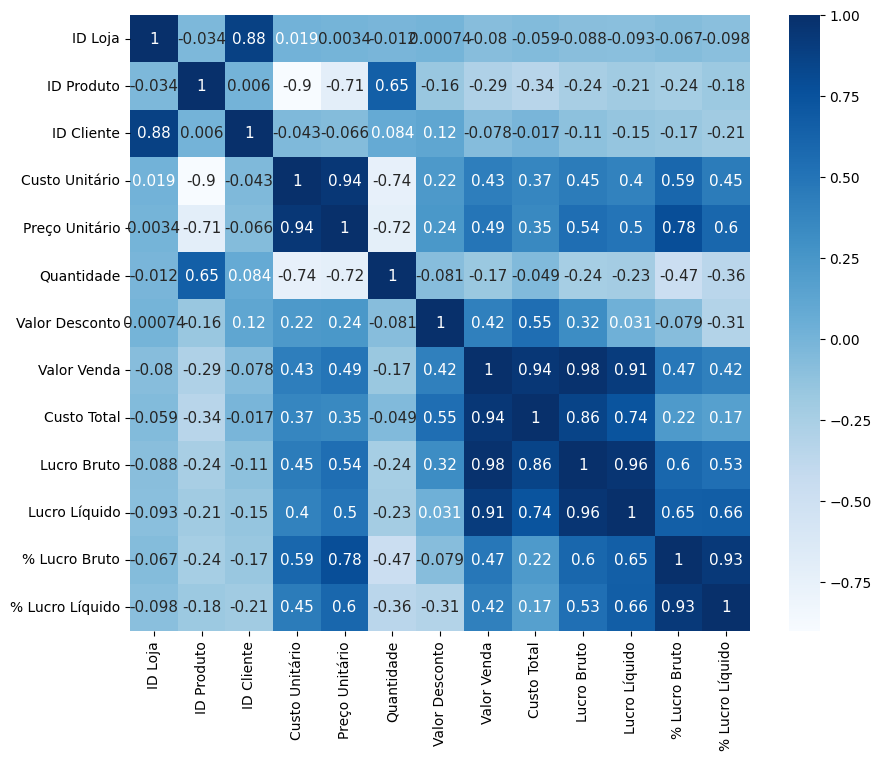

In [148]:
# Mapa de correlação das variáveis numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.show()

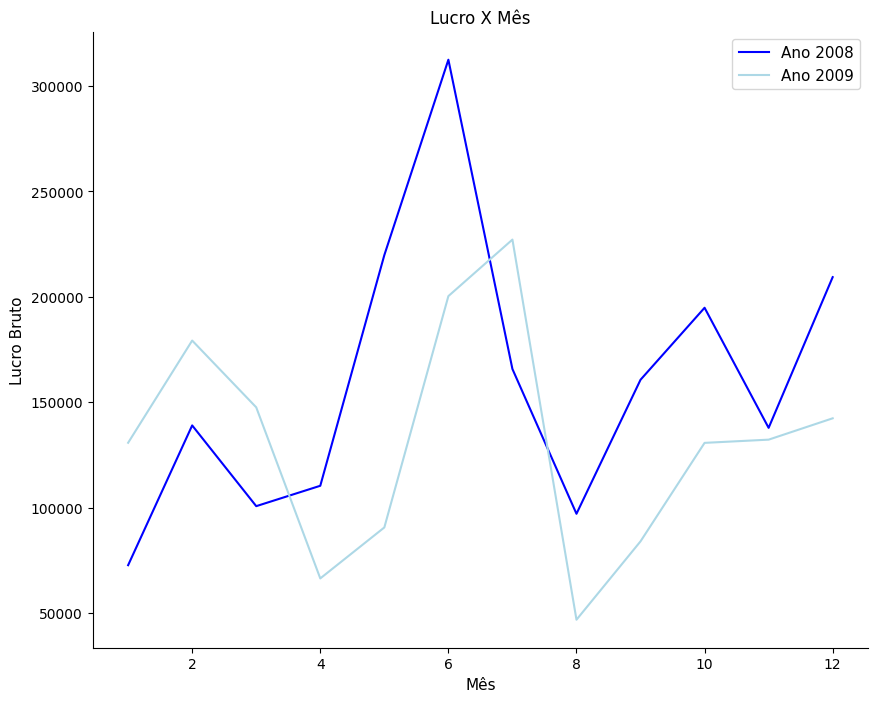

In [149]:
#Selecionando apenas as vendas de 2008
df_2008 = df[df['Data Venda'].dt.year == 2008]
#Selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
# Comparativo de lucro bruto por mês
df_2008.groupby(df_2008['Data Venda'].dt.month)['Lucro Bruto'].sum().plot(color="blue", label="Ano 2008")
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro Bruto'].sum().plot(color="lightblue", label="Ano 2009")
plt.title("Lucro X Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro Bruto")
plt.legend()
plt.show()

[Artigo Original](https://dadosaocubo.com/analise-exploratoria-de-dados-com-python-parte-ii/)